# ⚛️ H₂ VQE — Multi-Seed Noise Statistics (Production API)

This notebook studies how **noise** affects **H₂ VQE** using only the
**packaged VQE engine**. It focuses exclusively on **multi-seed statistics**:

- No manual QNodes
- No hand-built ansatz
- No single-seed demos

Instead, everything is driven by:

```python
from vqe.core import run_vqe_multi_seed_noise
```

---

## 🎯 What we compute

For the H₂ molecule using the **UCCSD** ansatz and **Adam** optimizer, we:

1. Sweep **depolarizing noise** strengths and compute:
   - Mean and standard deviation of the energy error (Delta E)
   - Mean and standard deviation of the fidelity vs a reference state
   - Across multiple random seeds
2. Repeat the same analysis for **amplitude damping** noise.

All Hamiltonian construction, ansatz building, devices, caching, and plotting
are handled inside the `vqe` package.

## 1️⃣ Imports and configuration

In [1]:
import numpy as np

from vqe.core import run_vqe_multi_seed_noise

## 2️⃣ Noise grid and seed selection

We now define:

- A set of **noise probabilities** between 0.0 and 0.10  
- A small set of **random seeds** for averaging  

These are reused for both depolarizing and amplitude-damping studies.

In [2]:
# Noise probabilities in [0.0, 0.10]
noise_levels = [float(x) for x in np.arange(0.0, 0.11, 0.02)]
print("Noise levels:", noise_levels)

# Multiple seeds for statistics
seeds = [int(s) for s in np.arange(0, 5)]
print("Seeds:", seeds)

# Optimizer settings
optimizer = "Adam"
steps = 50
stepsize = 0.2

Noise levels: [0.0, 0.02, 0.04, 0.06, 0.08, 0.1]
Seeds: [0, 1, 2, 3, 4]


## 3️⃣ Multi-seed depolarizing noise study

We first study **pure depolarizing noise**:

- `noise_type="depolarizing"`  
- Internally, amplitude damping is set to zero  
- The function:

  `run_vqe_multi_seed_noise(...)`

  will:
  - Run H₂ VQE across seeds and noise levels
  - Compute Delta E and fidelity statistics
  - Produce and save a plot via the shared plotting utilities

The plot is also displayed inline.


🔹 Computing noiseless reference runs...
Step 01/50: E = -1.116684 Ha
Step 02/50: E = -1.136994 Ha
Step 03/50: E = -1.131007 Ha
Step 04/50: E = -1.122700 Ha
Step 05/50: E = -1.130115 Ha
Step 06/50: E = -1.133031 Ha
Step 07/50: E = -1.134496 Ha
Step 08/50: E = -1.134652 Ha
Step 09/50: E = -1.132102 Ha
Step 10/50: E = -1.130839 Ha
Step 11/50: E = -1.133769 Ha
Step 12/50: E = -1.136856 Ha
Step 13/50: E = -1.136817 Ha
Step 14/50: E = -1.134837 Ha
Step 15/50: E = -1.133732 Ha
Step 16/50: E = -1.134458 Ha
Step 17/50: E = -1.135957 Ha
Step 18/50: E = -1.136742 Ha
Step 19/50: E = -1.136508 Ha
Step 20/50: E = -1.136055 Ha
Step 21/50: E = -1.135899 Ha
Step 22/50: E = -1.135938 Ha
Step 23/50: E = -1.136174 Ha
Step 24/50: E = -1.136688 Ha
Step 25/50: E = -1.137068 Ha
Step 26/50: E = -1.136886 Ha
Step 27/50: E = -1.136406 Ha
Step 28/50: E = -1.136270 Ha
Step 29/50: E = -1.136684 Ha
Step 30/50: E = -1.137181 Ha
Step 31/50: E = -1.137213 Ha
Step 32/50: E = -1.136850 Ha
Step 33/50: E = -1.136654 Ha
St

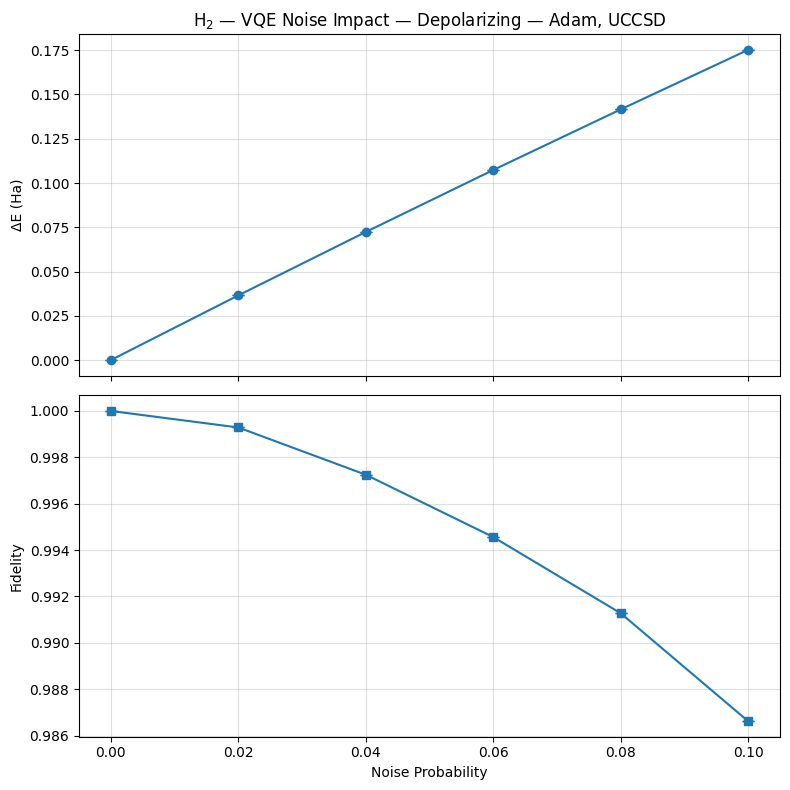

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/noise_stats_UCCSD_Adam_noise_scan_dep.png

✅ Multi-seed noise study complete for H2


In [3]:
_ = run_vqe_multi_seed_noise(
    molecule="H2",
    ansatz_name="UCCSD",
    optimizer_name=optimizer,
    steps=steps,
    stepsize=stepsize,
    seeds=seeds,
    noise_type="depolarizing",
    depolarizing_probs=noise_levels,
    mapping="jordan_wigner",
    force=False,
    show=True,
)

## 4️⃣ Multi-seed amplitude-damping noise study

Next we study **pure amplitude damping**:

- `noise_type="amplitude"`  
- Internally, depolarizing probabilities are set to zero  
- Again, `run_vqe_multi_seed_noise`:
  - Reuses caching where possible
  - Produces a Delta E vs noise and fidelity vs noise plot with error bars

We reuse the same `noise_levels` and `seeds` for consistency.

In [4]:
_ = run_vqe_multi_seed_noise(
    molecule="H2",
    ansatz_name="UCCSD",
    optimizer_name=optimizer,
    steps=steps,
    stepsize=stepsize,
    seeds=seeds,
    noise_type="amplitude",
    depolarizing_probs=noise_levels,
    mapping="jordan_wigner",
    force=False,
    show=True,
)


🔹 Computing noiseless reference runs...
Reference mean energy = -1.137176 Ha
Noise p_dep=0.00, p_amp=0.00: ΔE=0.000000 ± 0.000000, ⟨F⟩=1.0000
Step 01/50: E = -1.093296 Ha
Step 02/50: E = -1.112093 Ha
Step 03/50: E = -1.103239 Ha
Step 04/50: E = -1.101345 Ha
Step 05/50: E = -1.105254 Ha
Step 06/50: E = -1.109464 Ha
Step 07/50: E = -1.111946 Ha
Step 08/50: E = -1.109936 Ha
Step 09/50: E = -1.106591 Ha
Step 10/50: E = -1.107447 Ha
Step 11/50: E = -1.110573 Ha
Step 12/50: E = -1.112105 Ha
Step 13/50: E = -1.111698 Ha
Step 14/50: E = -1.110695 Ha
Step 15/50: E = -1.110047 Ha
Step 16/50: E = -1.110194 Ha
Step 17/50: E = -1.111037 Ha
Step 18/50: E = -1.112085 Ha
Step 19/50: E = -1.112530 Ha
Step 20/50: E = -1.111932 Ha
Step 21/50: E = -1.111062 Ha
Step 22/50: E = -1.111102 Ha
Step 23/50: E = -1.111942 Ha
Step 24/50: E = -1.112539 Ha
Step 25/50: E = -1.112458 Ha
Step 26/50: E = -1.112096 Ha
Step 27/50: E = -1.111889 Ha
Step 28/50: E = -1.111956 Ha
Step 29/50: E = -1.112215 Ha
Step 30/50: E = 

KeyboardInterrupt: 